In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv",parse_dates = True, index_col=0)

index_col=0 Toma la primera columna como índice.

parse_dates = True Intenta analizar el índice como fecha y hora de forma predeterminada

### Coeficiente de asimetría de Fisher
El coeficiente de asimetría de Fisher es un coeficiente que permite calcular la asimetría de una distribución. Es decir, el coeficiente de asimetría sirve para determinar si una función es asimétrica positiva, asimétrica negativa o simétrica. Dada una muestra {X1,X2,....Xn}, la fórmula del coeficiente de asimetría de Fisher es:

Donde, x y s son la media y desviación estandar muestrales.

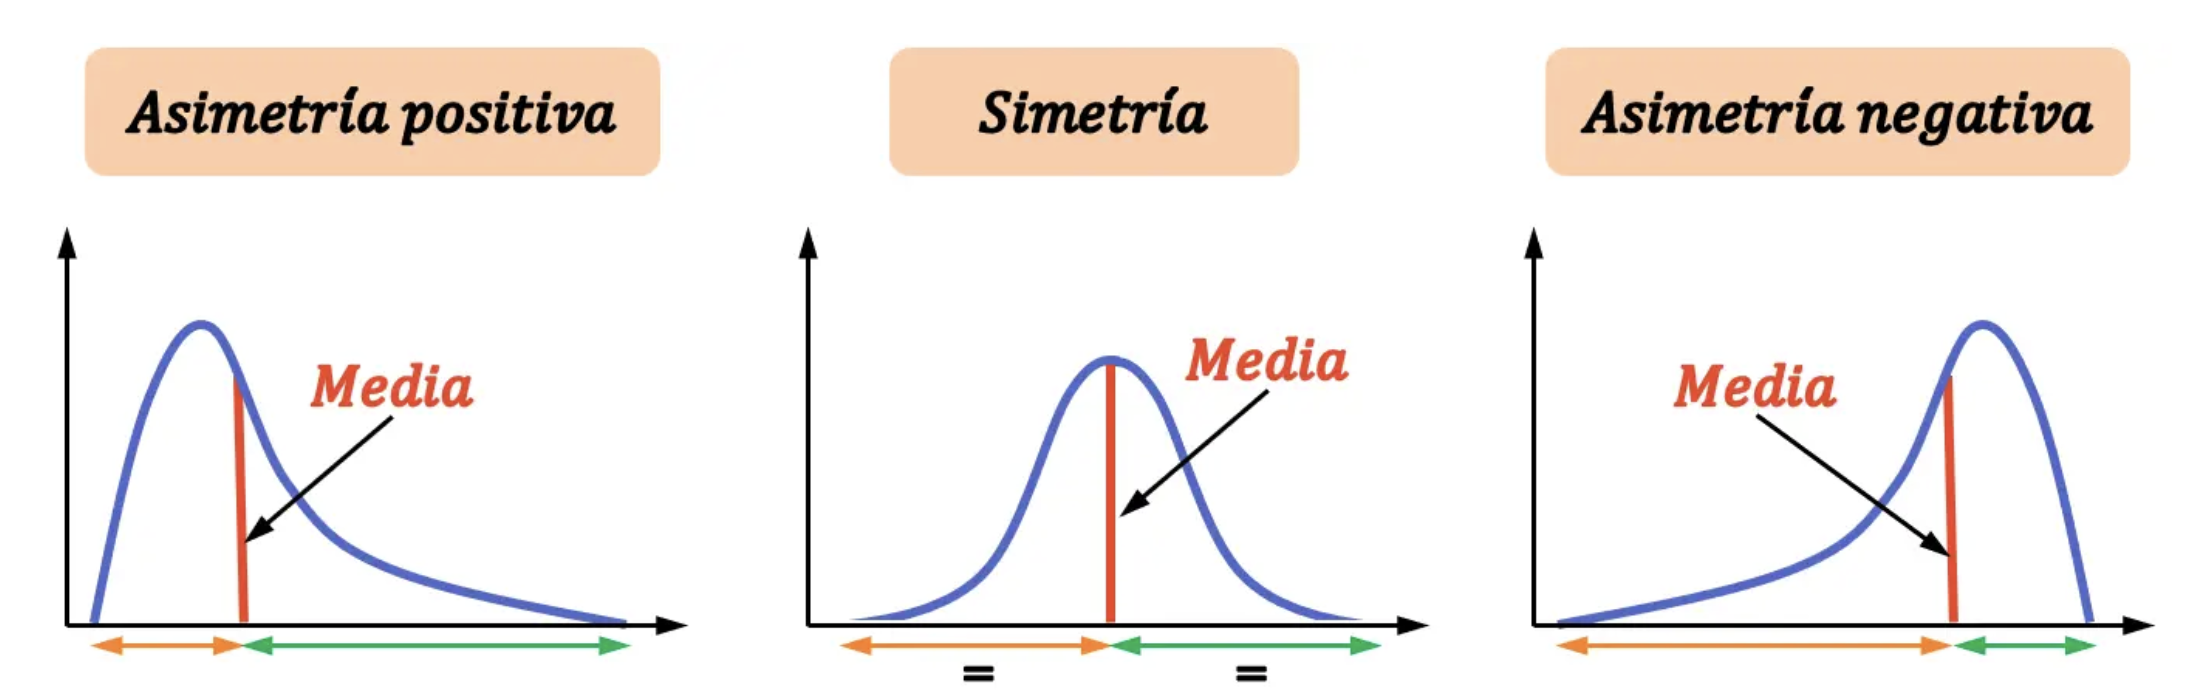

Si m > 0, la distribución es asimétrica positiva.

Si m < 0, la distribución es asimétrica negativa.


In [14]:
### 1. Encuentra el coeficiente de asimetría de los contaminantes.

df.skew()

CO      1.063310
NO      1.265967
NO2     0.773803
NOX     0.977845
O3      0.374217
PM10    0.559250
PM25    1.302965
SO2     2.802113
dtype: float64

La curtosis (Kurtosis) define en qué grado las colas de la distribución difieren de las colas de una distribución normal. Dada una muestra {X1,X2,...Xn}, el coeficiente de curtosis se define como:

Donde x y s son la media y desviación estandar muestrales.



Si k > 0, la distribución es leptocúrtica (distribución con colas más largas que la normal).

Si k = 0, la distribución es mesocúrtica (cuando tiene una distribución normal o su misma curtosis).

Si k < 0, la distribución es platicúrtica (distribución con colas menos largas que la normal.).

In [35]:
df.kurt()

CO       1.683262
NO       2.462188
NO2      1.428723
NOX      1.776258
O3       0.038129
PM10     0.314006
PM25     5.184911
SO2     10.735611
dtype: float64

<AxesSubplot: xlabel='CO', ylabel='Count'>

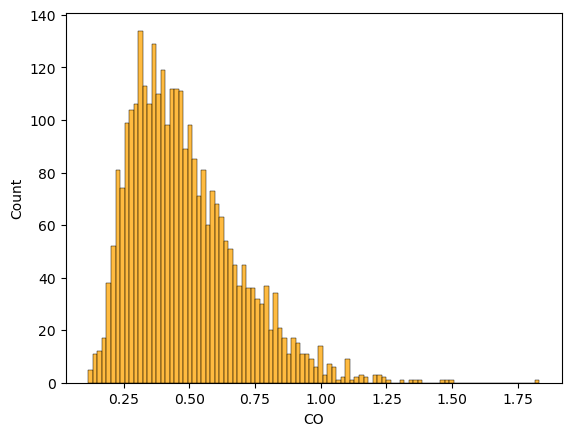

In [42]:
sns.histplot(df['CO'],bins=100,color='orange')

<AxesSubplot:xlabel='SO2', ylabel='Count'>

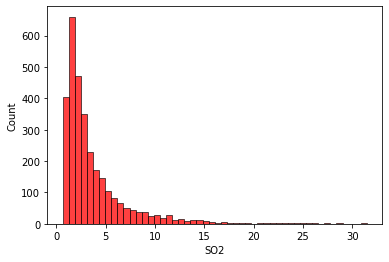

In [9]:
sns.histplot(df['SO2'],bins=50,color='red')

### Prueba de normalidad de Shapiro-Wilk
La prueba de Shapiro-Wilk se usa para contrastar la normalidad de un conjunto de datos. Se plantea como hipótesis nula que una muestra proviene de una población normalmente distribuida. Se considera uno de las pruebas más potentes para el contraste de normalidad. El estadístico de la prueba es:

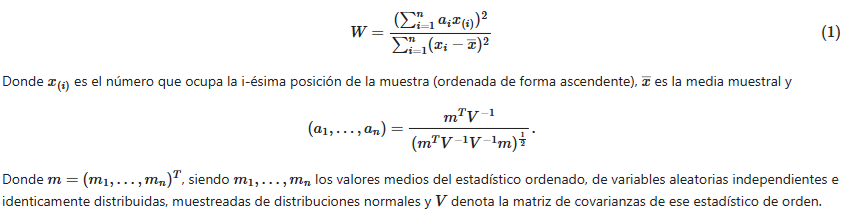

Se establecen dos hipótesis que se deberán contrastar:

Hipótesis nula (Ho): la muestra está distribuida normalmente.

Hipótesis alternativa (H1): la muestra no está distribuida normalmente.

Sea a=0.05. Aceptamos la Ho siempre y cuando el p-valor de esta prueba estadística sea mayor que 0.05. Aceptamos la H1 cuando el p-valor de la prueba sea menor que 0.05.

En [1], se encontró que la prueba de normalidad de Shapiro-Wilk es más potente para diferentes tamaños de muestra, que otras pruebas de normalidad, tales como la prueba de Kolmogorov-Smirnov, la prueba de Lilliefors y prueba de Anderson-Darling. Sin embargo, el poder de la prueba de Shapiro-Wilk aún es bajo para un tamaño de muestra pequeño (n<50).

[1] Razali, N. and Wah, Y., Power Comparisons of Shapiro-Wilk, Kolmogorov-Smirnov, Lilliefors and Anderson-Darling Tests, Journal of Statistical Modeling and Analytics, Vol. 2, No. 1, (2011), 21-33.

### 2. Realiza la prueba de S-W a los contaminantes.

In [44]:
from scipy.stats import shapiro

estadistico, p_value = shapiro(df['CO'])

print ('valor del estadistico= %.3f , p_value = %.3f' % (estadistico, p_value))

valor del estadistico= 0.938 , p_value = 0.000


In [46]:
from scipy.stats import shapiro

estadistico, p_value = shapiro(df['PM10'])

print ('valor del estadistico= %.3f , p_value = %.3f' % (estadistico, p_value))

valor del estadistico= 0.978 , p_value = 0.000


### Correlación
La correlación es una medida de la relación lineal entre dos variables cuantitativas contínuas (x, y). La manera más sencilla de saber si dos variables están correlacionadas es determinar si co-varían (varían conjuntamente). La correlación es en esencia una medida de asociación lineal entre dos variables. Esta medida o índice de correlación r puede variar entre -1 y +1, ambos extremos indicando correlaciones perfectas, negativa y positiva respectivamente. El índice r es una medida del tamaño del efecto, que suele interpretarse de la siguiente manera:

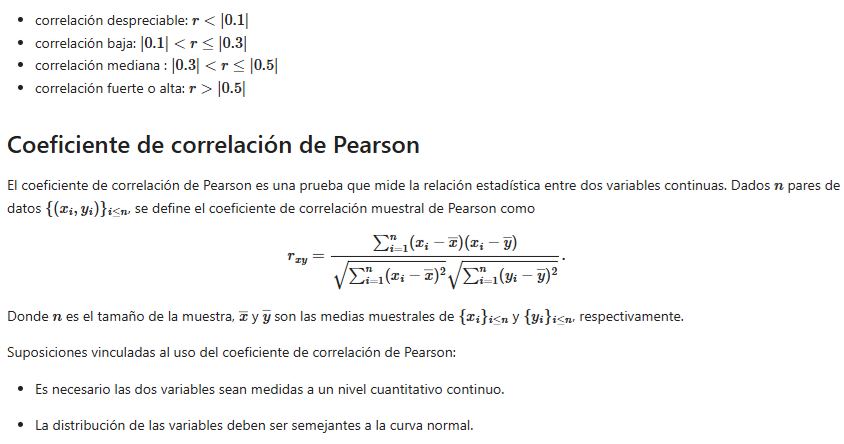

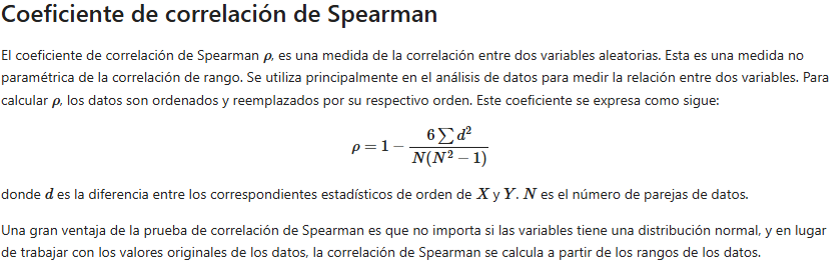

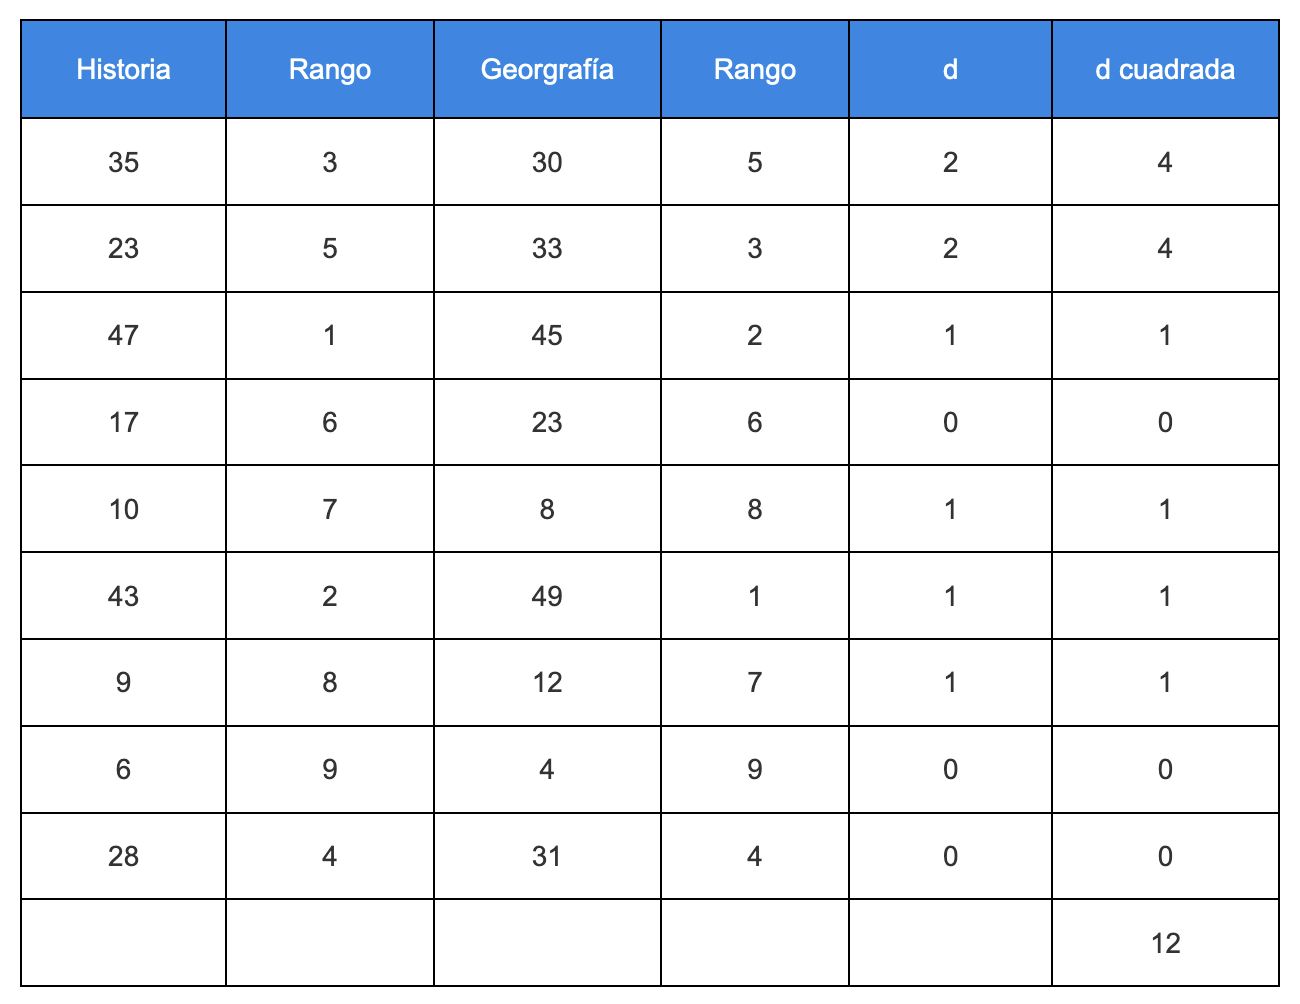

In [10]:
A=[35,23,47,17,10,43,9,6,28]
B=[30,33,45,23,8,49,12,4,31]

In [11]:
A = sorted(A,reverse=True)
B = sorted(B,reverse=True)

In [13]:
print (A)
print (B)

[47, 43, 35, 28, 23, 17, 10, 9, 6]
[49, 45, 33, 31, 30, 23, 12, 8, 4]


### 3. Encuentre la correlación entre los contaminantes e ilustra esto mediante un gráfico.

colores cmap: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [78]:
correlation_matrix= df.corr('spearman')

In [79]:
correlation_matrix

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
CO,1.000000,0.792279,0.844874,0.854311,-0.057146,0.525460,0.540627,0.377411
NO,0.792279,1.000000,0.801656,0.959736,-0.213371,0.539598,0.402232,0.328189
NO2,0.844874,0.801656,1.000000,0.932275,0.064124,0.695687,0.693741,0.476221
NOX,0.854311,0.959736,0.932275,1.000000,-0.088925,0.646696,0.560590,0.411711
O3,-0.057146,-0.213371,0.064124,-0.088925,1.000000,0.408806,0.462961,0.093813
PM10,0.525460,0.539598,0.695687,0.646696,0.408806,1.000000,0.858762,0.548739
PM25,0.540627,0.402232,0.693741,0.560590,0.462961,0.858762,1.000000,0.547311
SO2,0.377411,0.328189,0.476221,0.411711,0.093813,0.548739,0.547311,1.000000


<AxesSubplot:>

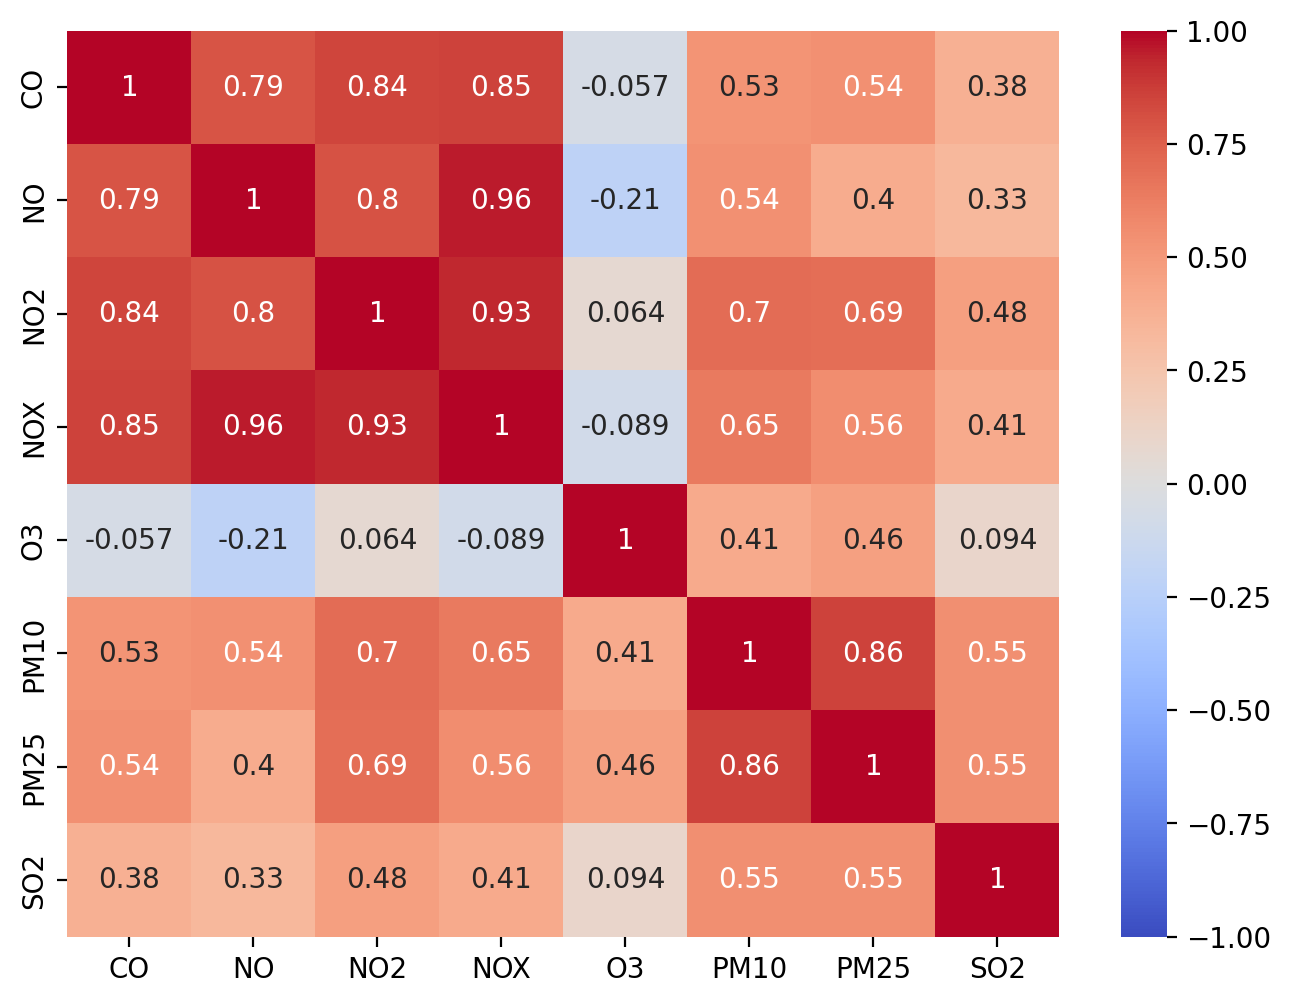

In [80]:
plt.figure(figsize=(8,6),dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1,vmax=1,center=0)
# annot: dar los valores en el grafico
# cmap: color al mapa
# vmin, vmax, center: dar el valor de los limites del grafico


### 4. Obtenga un Dataframe con los contaminantes que tengan una correlación alta en orden descendente. Y los diagramas de dispersión entre todos los contaminantes.

In [22]:
import pingouin as pg

In [23]:
corr = pg.pairwise_corr(df,method='spearman')

In [24]:
corr

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,CO,NO,spearman,two-sided,3073,0.792279,"[0.78, 0.81]",0.000000e+00,1.000000
1,CO,NO2,spearman,two-sided,3073,0.844874,"[0.83, 0.85]",0.000000e+00,1.000000
2,CO,NOX,spearman,two-sided,3073,0.854311,"[0.84, 0.86]",0.000000e+00,1.000000
3,CO,O3,spearman,two-sided,3073,-0.057146,"[-0.09, -0.02]",1.528766e-03,0.886914
4,CO,PM10,spearman,two-sided,3073,0.525460,"[0.5, 0.55]",9.243138e-218,1.000000
5,CO,PM25,spearman,two-sided,3073,0.540627,"[0.52, 0.57]",7.760858e-233,1.000000
6,CO,SO2,spearman,two-sided,3073,0.377411,"[0.35, 0.41]",1.285592e-104,1.000000
7,NO,NO2,spearman,two-sided,3073,0.801656,"[0.79, 0.81]",0.000000e+00,1.000000
8,NO,NOX,spearman,two-sided,3073,0.959736,"[0.96, 0.96]",0.000000e+00,1.000000
9,NO,O3,spearman,two-sided,3073,-0.213371,"[-0.25, -0.18]",5.664174e-33,1.000000


In [28]:
corr.sort_values(by='r',ascending = False) [['X','Y','r']]

,X,Y,r
8,NO,NOX,0.959736
13,NO2,NOX,0.932275
25,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
7,NO,NO2,0.801656
0,CO,NO,0.792279
15,NO2,PM10,0.695687
16,NO2,PM25,0.693741
19,NOX,PM10,0.646696


In [60]:
c=corr.sort_values(by='r',ascending = False) [['X','Y','r']]
c=c[(c['r']>0.5)| (c['r']<-0.5)]
c

,X,Y,r
8,NO,NOX,0.959736
13,NO2,NOX,0.932275
25,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
7,NO,NO2,0.801656
0,CO,NO,0.792279
15,NO2,PM10,0.695687
16,NO2,PM25,0.693741
19,NOX,PM10,0.646696


### Factores meteorológicos
La Red de Meteorología y Radiación Solar (REDMET) es el subsistema del Sistema de Monitoreo Atmosférico de la Ciudad de México (SIMAT) que realiza mediciones continuas y permanentes minuto a minuto de temperatura (TMP), humedad relativa (RH), dirección del viento (WDR) y la velocidad del viento (WSP).

https://datos.cdmx.gob.mx/dataset/redmet

### ¿Existe una correlación entre los contaminantes y los factores meteorológicos?

In [49]:
df2 = pd.read_csv("https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv",parse_dates = True, index_col=0)

In [50]:
df2

,RH,TMP,WDR,WSP
fecha,,,,
2015-01-01,60.565476,13.385714,156.723039,1.933333
2015-01-02,52.452381,13.567262,176.710784,2.559804
2015-01-03,55.763636,13.893333,190.830846,2.136318
2015-01-04,62.776786,12.536012,196.306373,2.592647
2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...
2023-05-27,51.899130,19.453565,190.198664,2.187646
2023-05-28,59.949565,17.375826,183.542571,2.092154
2023-05-29,58.837743,17.039153,169.527919,1.952284


In [51]:
estadistico, p_value = shapiro(df2['RH'])

print('valor del estadistico= %.3f , p_value = %.3f' % (estadistico, p_value))

valor del estadistico= 0.985 , p_value = 0.000


In [52]:
cm = pd.concat([df,df2],axis=1)

In [54]:
cm

,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,RH,TMP,WDR,WSP
fecha,,,,,,,,,,,,
2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,60.565476,13.385714,156.723039,1.933333
2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,52.452381,13.567262,176.710784,2.559804
2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,55.763636,13.893333,190.830846,2.136318
2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,62.776786,12.536012,196.306373,2.592647
2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,51.899130,19.453565,190.198664,2.187646
2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,59.949565,17.375826,183.542571,2.092154
2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,58.837743,17.039153,169.527919,1.952284


<AxesSubplot: >

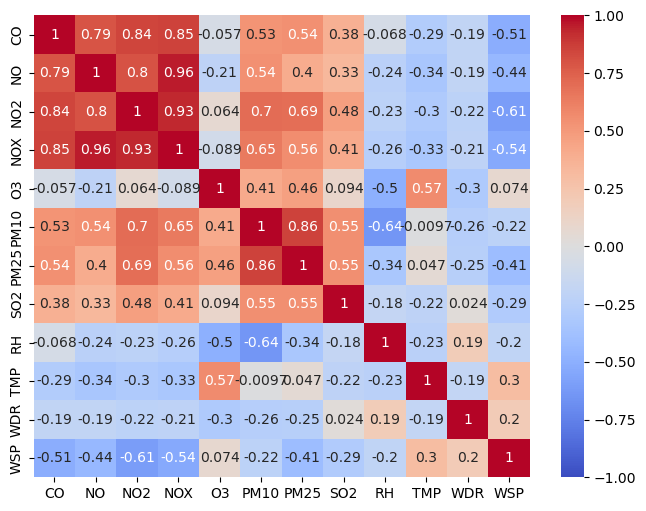

In [57]:
cor_matrix = cm.corr("spearman")
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,center=0)

In [61]:
corr = pg.pairwise_corr(cm,method='spearman')
c = corr.sort_values(by='r',ascending=False)[['X','Y','r']]
c=c[(c['r']>0.5)| (c['r']<-0.5)]
c

,X,Y,r
12,NO,NOX,0.959736
21,NO2,NOX,0.932275
45,PM10,PM25,0.858762
2,CO,NOX,0.854311
1,CO,NO2,0.844874
11,NO,NO2,0.801656
0,CO,NO,0.792279
23,NO2,PM10,0.695687
24,NO2,PM25,0.693741
31,NOX,PM10,0.646696


<AxesSubplot: xlabel='RH', ylabel='PM10'>

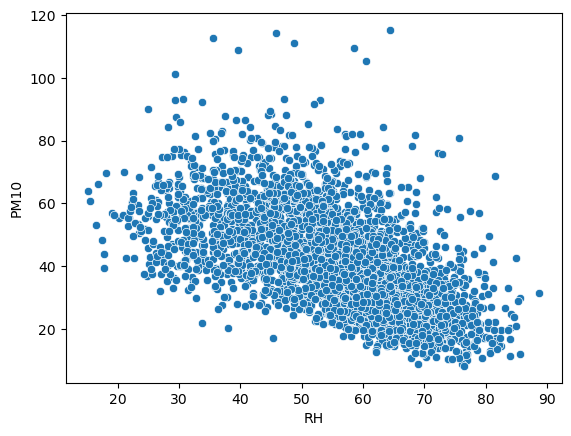

In [72]:
sns.scatterplot(x='RH', y='PM10', data=cm)